In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def plotConvergenceData(filename):
    df = pd.read_csv(filename)

    fig, ax = plt.subplots()

    df.plot(x='time-window-size', marker='s', ax=ax)


    # Add reference lines
    orders = [1]
    linestyles = ['dotted', 'dashed', 'dashdot', 'solid']
    startvals = [0.8e-3]
    for order, linestyle, startval in zip(orders, linestyles, startvals):    
        order_guide = [startval / (2 ** (order*i)) for i in range(0, len(df['time-window-size']))]
        ax.loglog(df['time-window-size'], order_guide, color='black', linestyle=linestyle, label=f"Order {order}")


    ax.set_title(filename)
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=10)
    ax.grid(which='both')
    ax.legend()
    ax.set_xlabel('Time window size')
    ax.set_ylabel('L2 error')


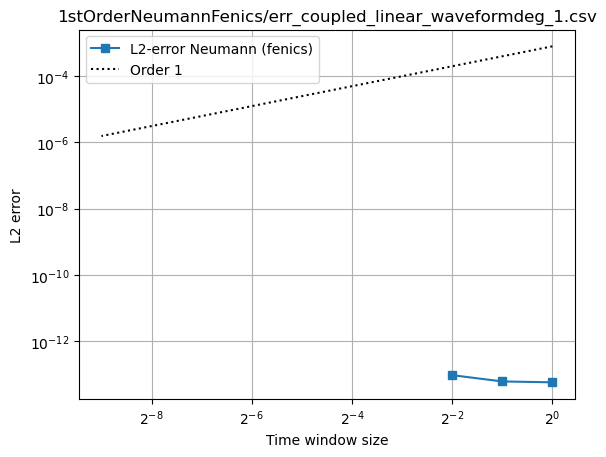

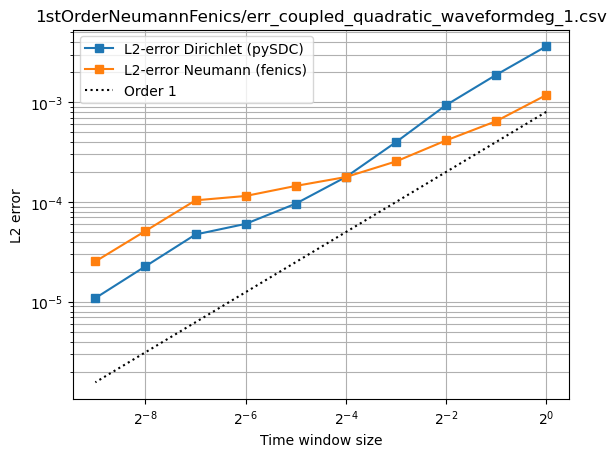

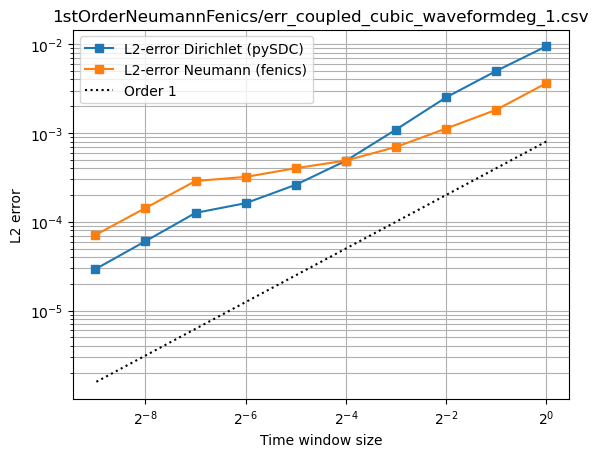

In [12]:
filenames = [
        '1stOrderNeumannFenics/err_coupled_linear_waveformdeg_1.csv',
        '1stOrderNeumannFenics/err_coupled_quadratic_waveformdeg_1.csv',
        '1stOrderNeumannFenics/err_coupled_cubic_waveformdeg_1.csv'
    ]

for filename in filenames:
    plotConvergenceData(filename)